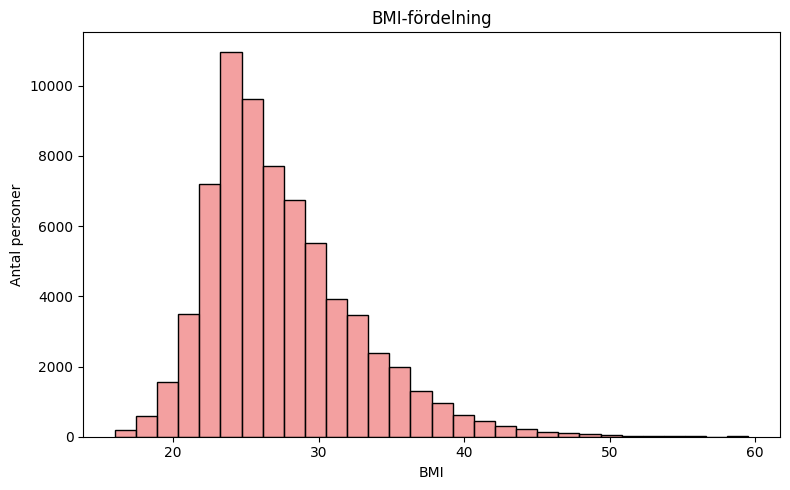

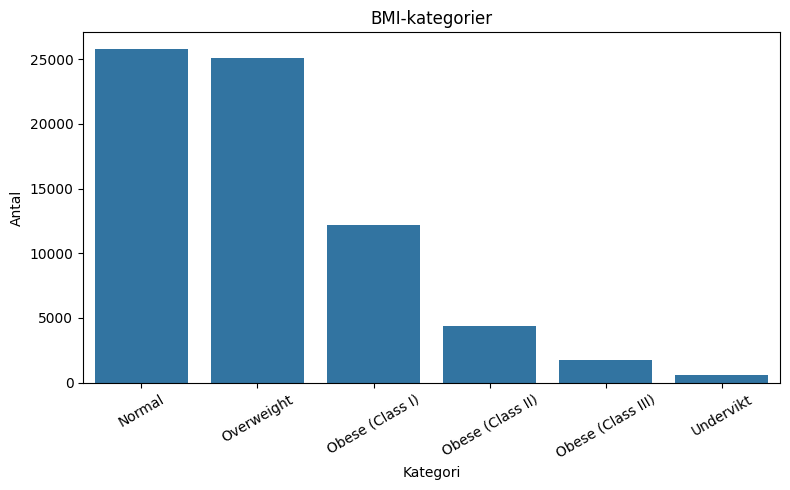

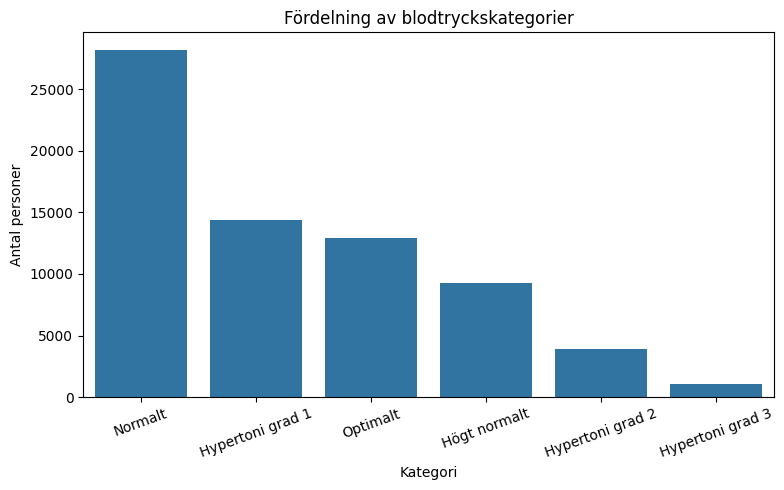

Kolesterolnivåer (absolut):
cholesterol
1    52182
2     9514
3     8049
Name: count, dtype: int64
Kolesterolnivåer (%):
cholesterol
1    74.8
2    13.6
3    11.5
Name: count, dtype: float64


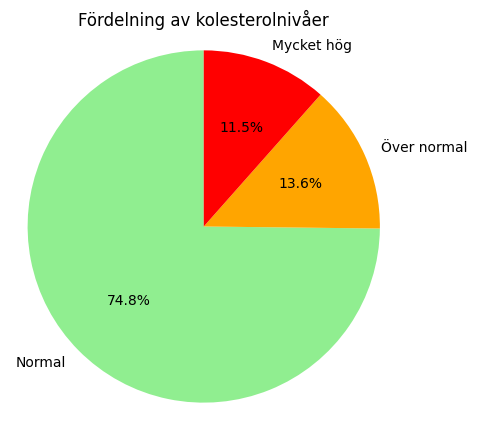

Åldersintervall (i år):
Min: 29
Max: 64
Medel: 52.8


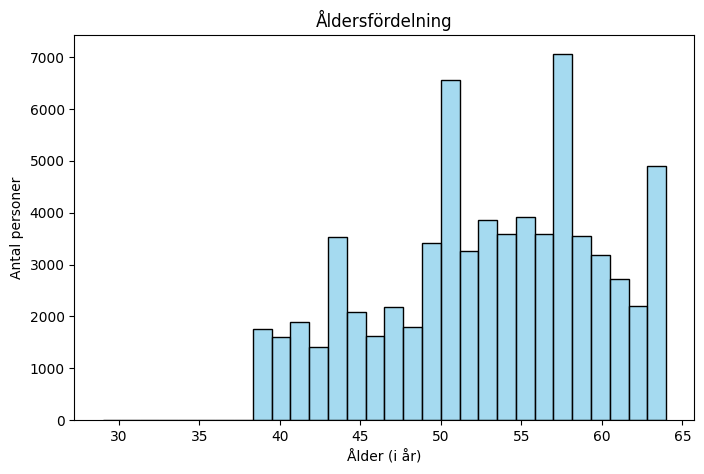

Rökning (absolut):
smoke
0    63591
1     6154
Name: count, dtype: int64
Rökning (%):
smoke
0    91.2
1     8.8
Name: count, dtype: float64


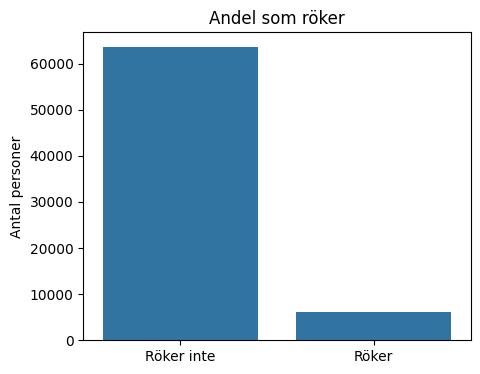

Viktstatistik:
count    69745.000000
mean        74.214528
std         14.210732
min         40.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        180.000000
Name: weight, dtype: float64


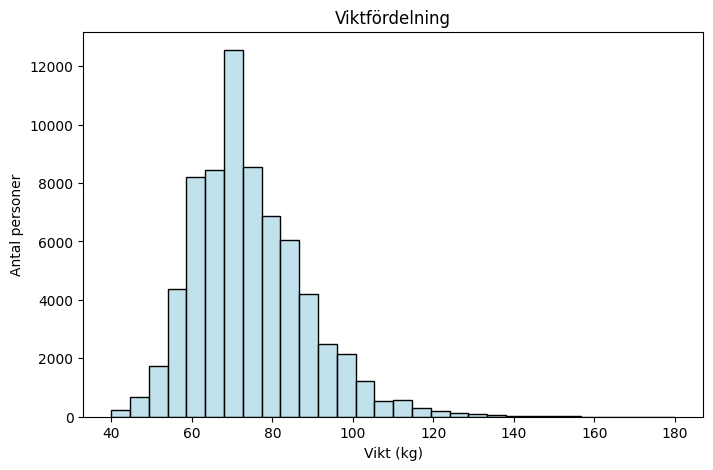

Längdstatistik:
count    69745.000000
mean       164.467847
std          7.804165
min        140.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        207.000000
Name: height, dtype: float64


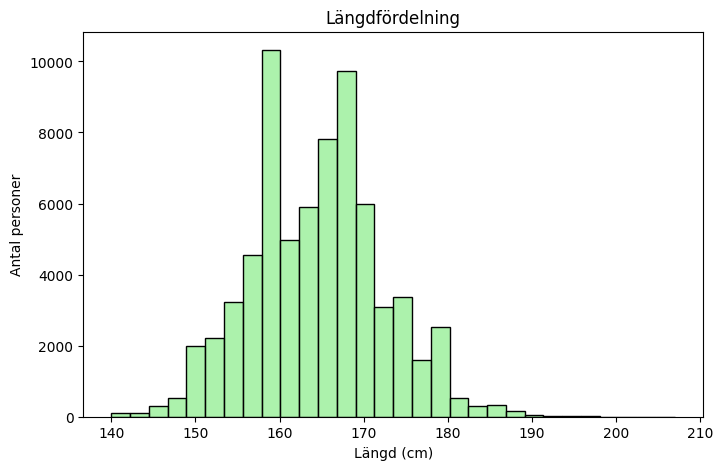

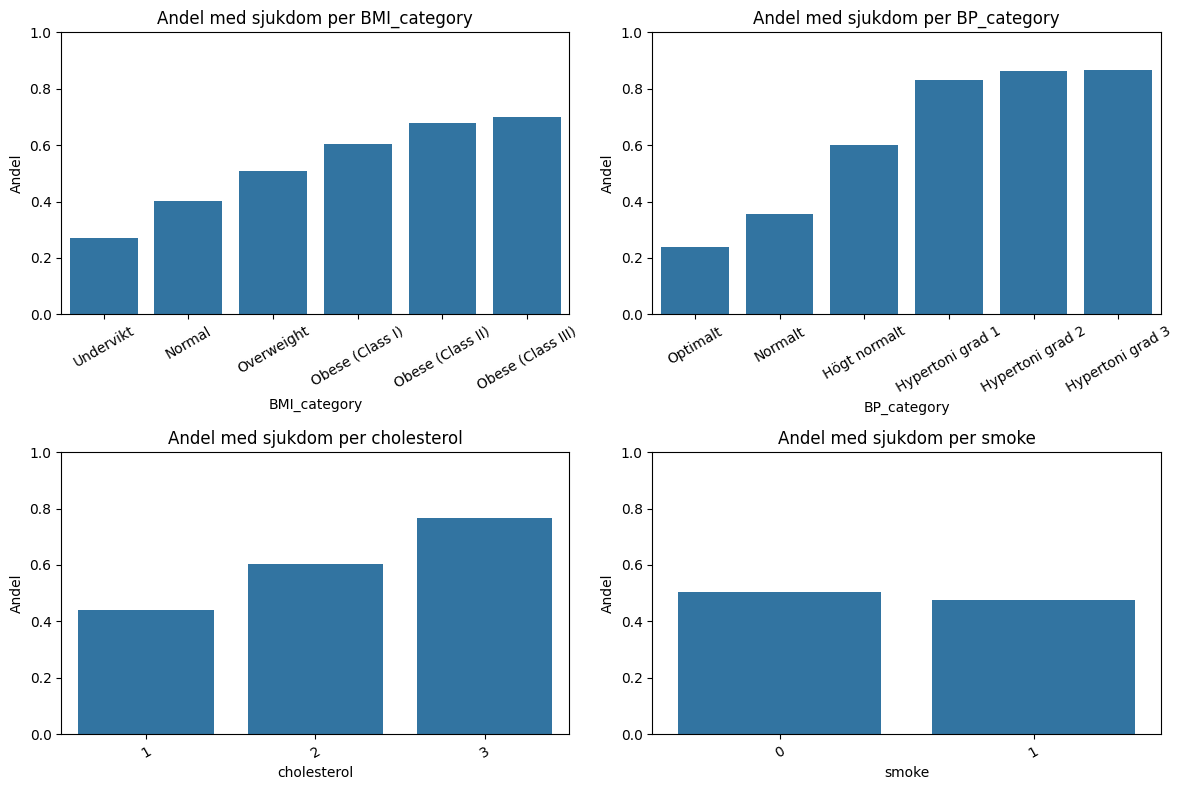

Andel med hjärt-kärlsjukdom (%):
gender_label
Kvinna    49.7
Man       50.5
Name: cardio, dtype: float64


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [68]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("cardio_train.csv", sep=";")
df["gender_label"] = df["gender"].map({1: "Kvinna", 2: "Man"})  # Flyttad hit

# Konvertera ålder till år
df["age_years"] = (df["age"] // 365).astype(int)

# Skapa BMI-kolumn och kategorier
df = df[(df["height"] >= 140) & (df["height"] <= 210)]
df = df[(df["weight"] >= 40) & (df["weight"] <= 180)]
df = df.copy()
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)
df = df[(df["BMI"] >= 16) & (df["BMI"] <= 60)]

def bmi_category(bmi):
    if bmi < 18.5:
        return "Undervikt"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35:
        return "Obese (Class I)"
    elif bmi < 40:
        return "Obese (Class II)"
    else:
        return "Obese (Class III)"

df["BMI_category"] = df["BMI"].apply(bmi_category)

# BMI - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["BMI"], bins=30, color="lightcoral", edgecolor="black")
plt.title("BMI-fördelning")
plt.xlabel("BMI")
plt.ylabel("Antal personer")
plt.tight_layout()
plt.show()

# BMI - Stapeldiagram
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="BMI_category", order=df["BMI_category"].value_counts().index)
plt.title("BMI-kategorier")
plt.xlabel("Kategori")
plt.ylabel("Antal")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Blodtryckskategorier 
def classify_bp(systolic):
    if systolic < 120:
        return "Optimalt"
    elif systolic < 130:
        return "Normalt"
    elif systolic < 140:
        return "Högt normalt"
    elif systolic < 160:
        return "Hypertoni grad 1"
    elif systolic < 180:
        return "Hypertoni grad 2"
    else:
        return "Hypertoni grad 3"

df["BP_category"] = df["ap_hi"].apply(classify_bp)

# Blodtryck 
bp_counts = df["BP_category"].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="BP_category", order=bp_counts.index)
plt.title("Fördelning av blodtryckskategorier")
plt.xlabel("Kategori")
plt.ylabel("Antal personer")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Kolesterolnivåer 
chol_counts = df["cholesterol"].value_counts().sort_index()
chol_labels = ["1 = Normal", "2 = Över normal", "3 = Mycket hög"]
chol_percent = round((chol_counts / len(df)) * 100, 1)
print("Kolesterolnivåer (absolut):")
print(chol_counts)
print("Kolesterolnivåer (%):")
print(chol_percent)

labels = ["Normal", "Över normal", "Mycket hög"]
colors = ["lightgreen", "orange", "red"]
plt.figure(figsize=(5,5))
plt.pie(chol_counts, labels=labels, autopct="%.1f%%", startangle=90, colors=colors)
plt.title("Fördelning av kolesterolnivåer")
plt.axis("equal")
plt.show()

# Ålder-statistik
print("Åldersintervall (i år):")
print("Min:", df["age_years"].min())
print("Max:", df["age_years"].max())
print("Medel:", round(df["age_years"].mean(), 1))

plt.figure(figsize=(8,5))
sns.histplot(df["age_years"], bins=30, kde=False, color="skyblue", edgecolor="black")
plt.title("Åldersfördelning")
plt.xlabel("Ålder (i år)")
plt.ylabel("Antal personer")
plt.show()

#  Rökning-statistik
smoke_counts = df["smoke"].value_counts()
smoke_percent = round((smoke_counts / len(df)) * 100, 1)
print("Rökning (absolut):")
print(smoke_counts)
print("Rökning (%):")
print(smoke_percent)

plt.figure(figsize=(5,4))
sns.barplot(x=["Röker inte", "Röker"], y=smoke_counts.sort_index())
plt.title("Andel som röker")
plt.ylabel("Antal personer")
plt.show()

# Viktstatistik
print("Viktstatistik:")
print(df["weight"].describe())

plt.figure(figsize=(8,5))
sns.histplot(df["weight"], bins=30, color="lightblue", edgecolor="black")
plt.title("Viktfördelning")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal personer")
plt.show()

# Längdstatistik
print("Längdstatistik:")
print(df["height"].describe())

plt.figure(figsize=(8,5))
sns.histplot(df["height"], bins=30, color="lightgreen", edgecolor="black")
plt.title("Längdfördelning")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal personer")
plt.show()

# Visualiseringar: Andel sjukdom per kategori 
def plot_heart_disease_rate(col, ax):
    rate = df.groupby(col)["cardio"].mean().sort_values()
    sns.barplot(x=rate.index, y=rate.values, ax=ax)
    ax.set_title(f"Andel med sjukdom per {col}")
    ax.set_ylabel("Andel")
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=30)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plot_heart_disease_rate("BMI_category", axes[0, 0])
plot_heart_disease_rate("BP_category", axes[0, 1])
plot_heart_disease_rate("cholesterol", axes[1, 0])
plot_heart_disease_rate("smoke", axes[1, 1])

plt.tight_layout()
plt.show()

# Kön och sjukdom – andel sjuka
gender_cardio = df.groupby("gender_label")["cardio"].mean() * 100
print("Andel med hjärt-kärlsjukdom (%):")
print(round(gender_cardio, 1))

# Skillnad män/kvinnor med sjukdom
gender_cardio = df.groupby(["gender_label", "cardio"]).size().unstack()
gender_cardio["Totalt"] = gender_cardio[0] + gender_cardio[1]
gender_cardio["Andel sjuk (%)"] = round(gender_cardio[1] / gender_cardio["Totalt"] * 100, 1)

plt.figure(figsize=(6,4))


### === Motivering till BMI-gränser ===
#### För att minska påverkan av outliers valde jag att filtrera bort extremt låga och höga BMI-värden.
#### Gränsen BMI < 16 motsvarar svår undervikt enligt WHO och kan bero på felregistrering.
#### Gränsen BMI > 60 är ovanlig även hos individer med fetma, och dessa värden misstänks också vara orimliga.
#### Detta steg förbättrar datakvaliteten inför vidare analys och modellträning.

### === Motivering till blodtryckskategorier ===
#### Blodtryckskategorierna är baserade på medicinska riktlinjer från WHO och Healthline:
#### https://www.healthline.com/health/high-blood-pressure-hypertension-definition
#### - <120 mmHg → Optimalt
#### - 120–129 → Normalt
#### - 130–139 → Högt normalt
#### - 140–159 → Hypertoni grad 1
#### - 160–179 → Hypertoni grad 2
#### - ≥180 → Hypertoni grad 3
#### Denna indelning gör det enklare att analysera risknivåer kopplade till hjärt-kärlsjukdom.

### === Analys av korrelationer ===
#### I korrelationsmatrisen ser vi bland annat att:
#### - ap_hi (systoliskt blodtryck) och ap_lo (diastoliskt) har en relativt stark positiv korrelation, vilket är väntat.
#### - weight, BMI och height är också korrelerade – BMI beräknas direkt från dessa två.
#### - age har viss korrelation med cardio, vilket tyder på att äldre deltagare oftare har hjärt-kärlsjukdom.
#### Dessa insikter kan användas för feature selection och för att förstå bakomliggande samband i datan.